<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/Ensemble/Boosting/GradientBoost/GradientBoostingStepByStep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.random.rand(100, 1) - 0.5 # sot that centre is 0
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

import pandas as pd

df = pd.DataFrame()

df['X'] = X.reshape(100)
df['y'] = y

In [2]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X Vs Y')

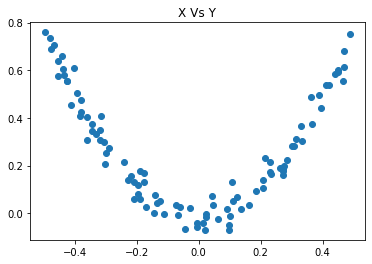

In [3]:
plt.scatter(df.X, df.y)
plt.title("X Vs Y")

In [7]:
df['pre1'] = df['y'].mean()
df

,X,y,pre1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [8]:
df['res1'] = df['y'] - df['pre1']
df

,X,y,pre1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


Text(0.5, 1.0, 'X vs res1')

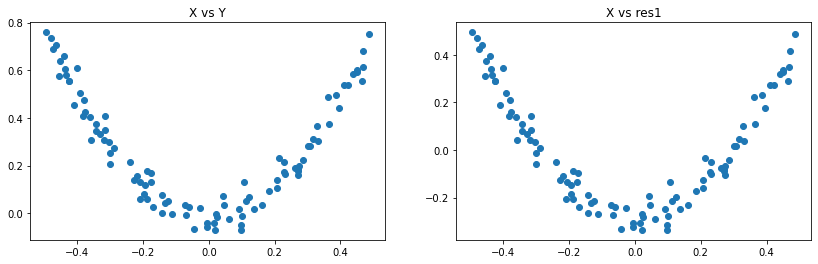

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

plt.subplot(122)
plt.scatter(df['X'],df['res1'])
plt.title('X vs res1')

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(max_leaf_nodes=8) # we generally take max_leaf_nodes between 8 - 32, since data was small, we took 8

tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

[Text(0.4090909090909091, 0.9166666666666666, 'X[0] <= -0.36\nsquared_error = 0.056\nsamples = 100\nvalue = -0.0'),
 Text(0.18181818181818182, 0.75, 'X[0] <= -0.43\nsquared_error = 0.012\nsamples = 18\nvalue = 0.309'),
 Text(0.09090909090909091, 0.5833333333333334, 'squared_error = 0.004\nsamples = 9\nvalue = 0.395'),
 Text(0.2727272727272727, 0.5833333333333334, 'squared_error = 0.005\nsamples = 9\nvalue = 0.222'),
 Text(0.6363636363636364, 0.75, 'X[0] <= 0.322\nsquared_error = 0.04\nsamples = 82\nvalue = -0.068'),
 Text(0.45454545454545453, 0.5833333333333334, 'X[0] <= -0.235\nsquared_error = 0.016\nsamples = 67\nvalue = -0.142'),
 Text(0.36363636363636365, 0.4166666666666667, 'squared_error = 0.003\nsamples = 12\nvalue = 0.041'),
 Text(0.5454545454545454, 0.4166666666666667, 'X[0] <= 0.211\nsquared_error = 0.009\nsamples = 55\nvalue = -0.182'),
 Text(0.45454545454545453, 0.25, 'X[0] <= -0.172\nsquared_error = 0.005\nsamples = 42\nvalue = -0.223'),
 Text(0.36363636363636365, 0.083333

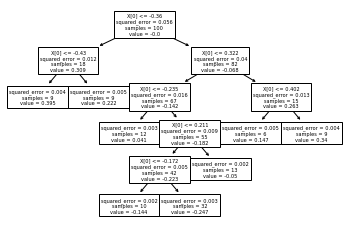

In [11]:
from sklearn.tree import plot_tree
plot_tree(tree1)

In [12]:
! pip install dtreeviz

In [15]:
from dtreeviz.trees import *

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


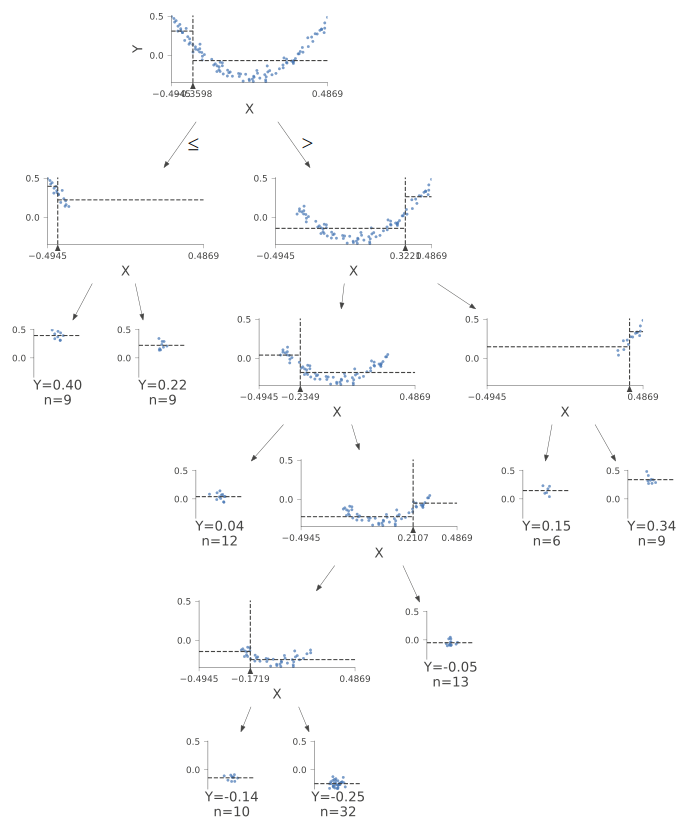

In [16]:
viz = dtreeviz(tree1,
               df['X'].values.reshape(100,1),
               df['res1'].values,
               feature_names="X",
               target_name="Y",
               scale=1.5)

viz

In [19]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)

y_pred = df.y.mean() + tree1.predict(X_test.reshape(500, 1))

y_pred.shape

(500,)

Text(0.5, 1.0, 'X vs y')

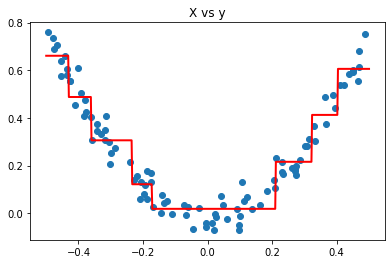

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [21]:
df['pre2'] = df.y.mean() + tree1.predict(df['X'].values.reshape(100,1))
df

,X,y,pre1,res1,pre2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018320
4,-0.343981,0.343986,0.265458,0.078528,0.305965
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018320
96,0.022733,-0.002305,0.265458,-0.267763,0.018320
97,-0.072459,0.032809,0.265458,-0.232650,0.018320
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [22]:
df['res2'] = df['y'] - df['pre2']
df

,X,y,pre1,res1,pre2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018320,-0.058995
96,0.022733,-0.002305,0.265458,-0.267763,0.018320,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018320,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028603


In [23]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

Text(0.5, 1.0, 'X vs res2')

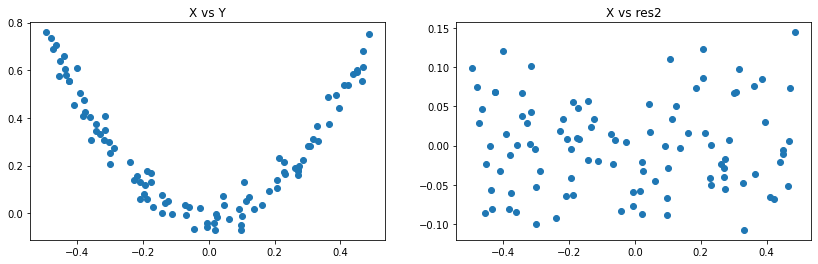

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

plt.subplot(122)
plt.scatter(df['X'],df['res2'])
plt.title('X vs res2')

Text(0.5, 1.0, 'X vs y')

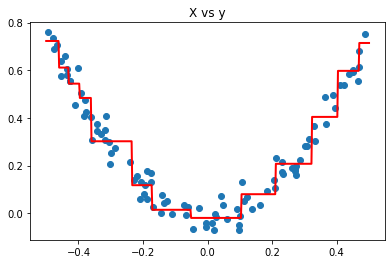

In [25]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')